In [9]:
# Aprendizado não supervisionado - Terefa Agrupamento (KMeans)
# Carregando os métodos necessários
# Observação: Para permitir visualização dos grupos criados este script considera apenas problemas com duas features 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd


In [10]:
# Gerando dados artificialmente
# Neste exemplo consideramos amostras distribuídas em 4 grupos distintos
#from sklearn.datasets import make_blobs
#X, _ = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#
#                  random_state=1)  # For reproducibility

df=pd.read_csv('s1.csv')
X=df.values



K = 3 Average Silhouette_score : 0.41893448164292707
Inertia : 216531300039035.88
K = 7 Average Silhouette_score : 0.5314746974838074
Inertia : 66695948589847.98
K = 15 Average Silhouette_score : 0.7113229626231456
Inertia : 8913777907195.008
K = 20 Average Silhouette_score : 0.5893650726537316
Inertia : 7970355837615.428


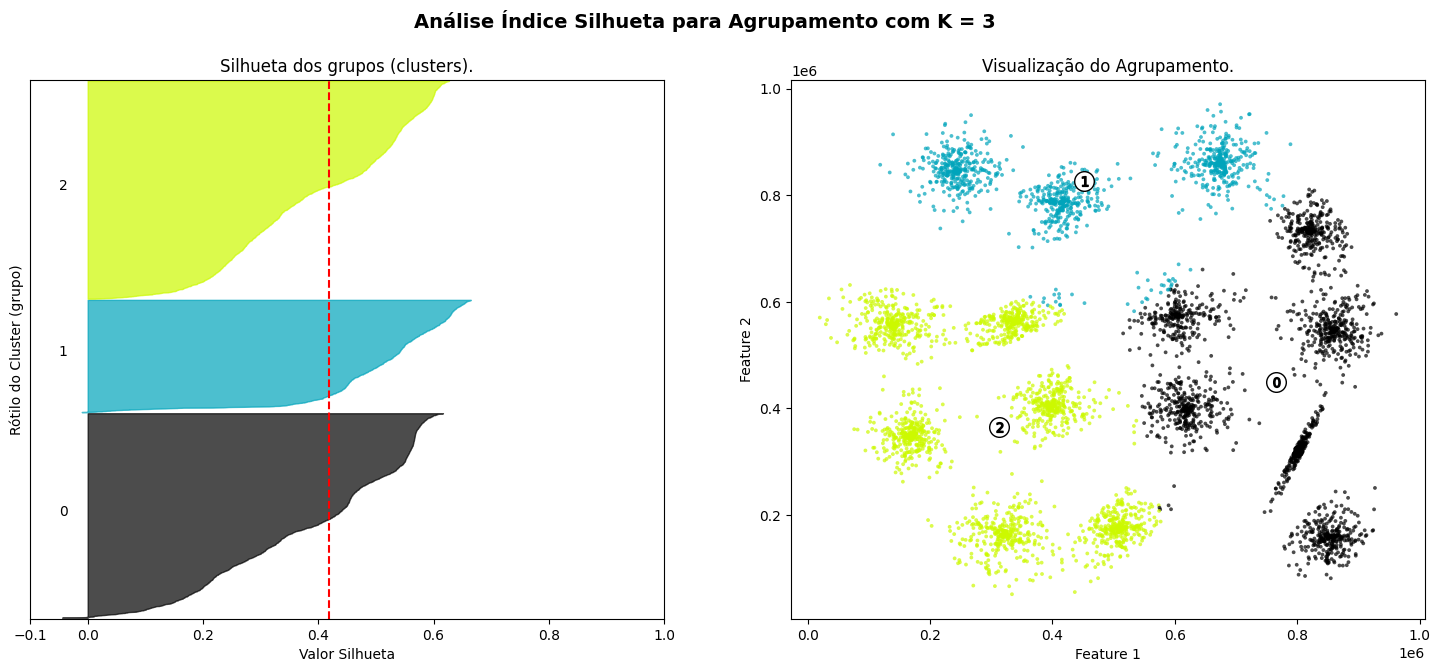

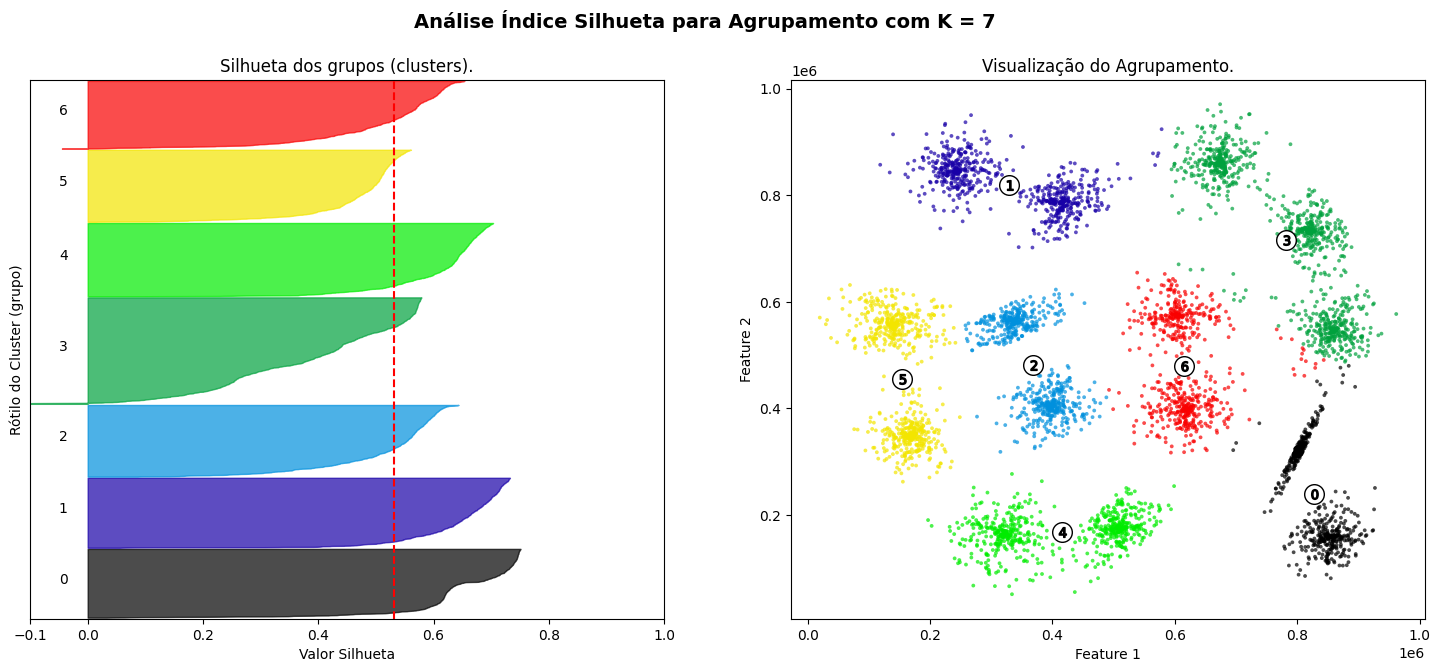

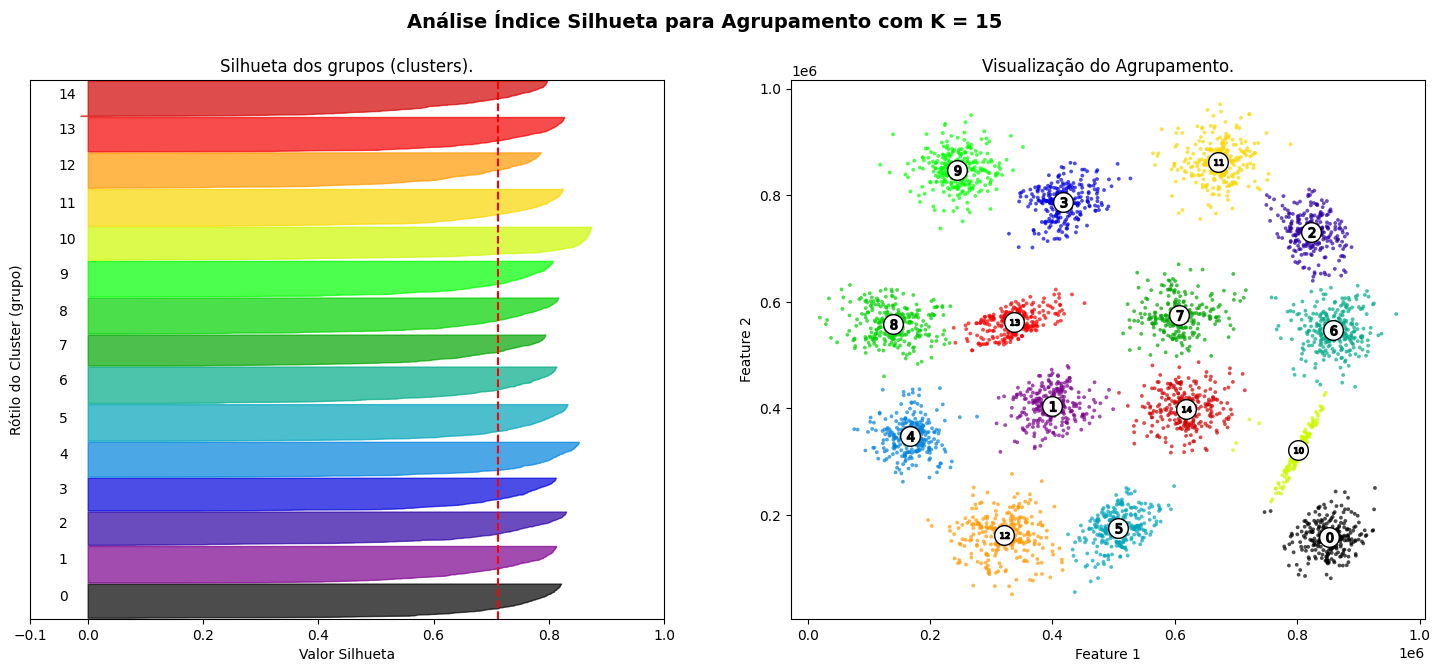

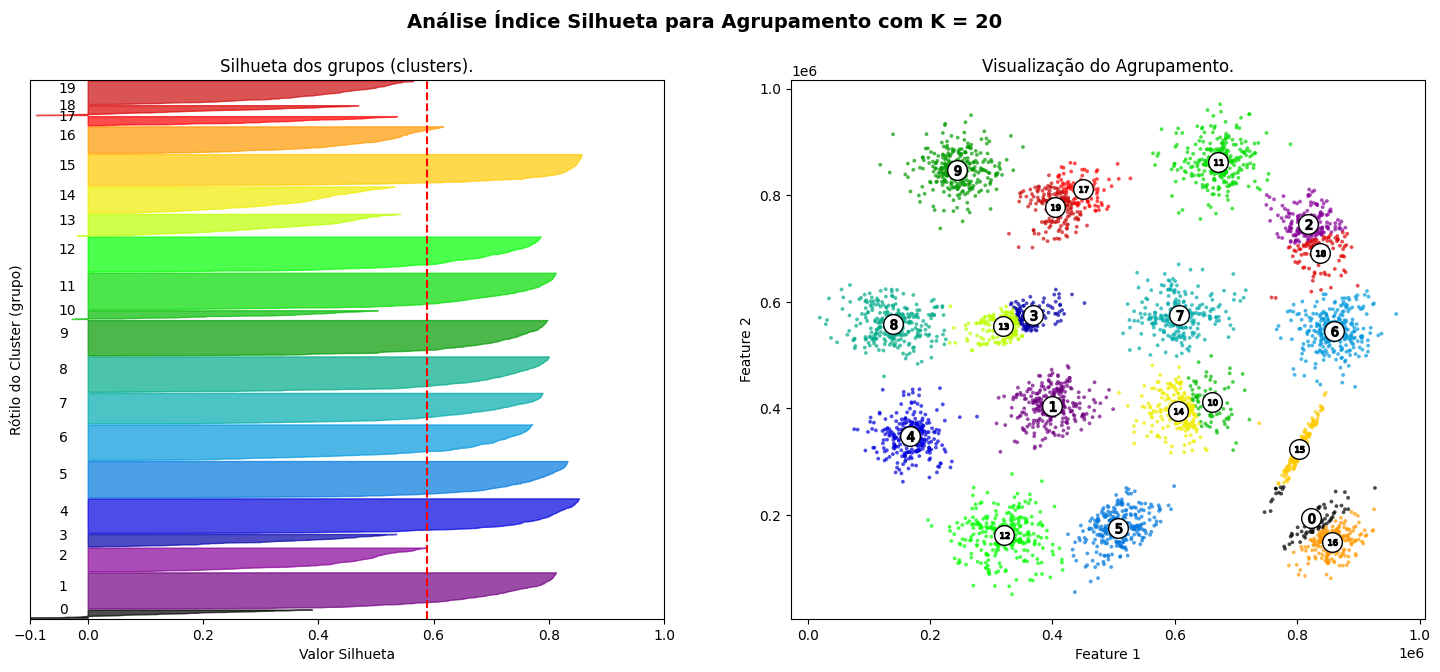

In [11]:
# Realizando agrupamentos, considerando diferentes valores de K
range_n_clusters = [3, 7, 15, 20]

dt_iner=[]  # lista para armazenar Inertia

# Uso do KMeans, índice silhueta e inértia
for k in range_n_clusters:
    # Cria subplots para os gráficos
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Primeiro subplot para silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    # Executando o KMeans (Agrupamento)
    clusterer = KMeans(n_clusters=k, n_init='auto', random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    a = np.asarray(cluster_labels)
    np.savetxt('classes'+str(k), a, fmt='%i', delimiter="\n")

    # Calculando Valor Médio da Silhueta 
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    print("K =", k,
          "Average Silhouette_score :", silhouette_avg)
    
    print("Inertia :", clusterer.inertia_)
 
    # Guardando Inertia para gráfico cotovelo (Elbow)
    dt_iner.append(clusterer.inertia_)
    
    # Calculando valor silhueta para cada exemplo da base 
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Plotando gráficos
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhueta dos grupos (clusters).")
    ax1.set_xlabel("Valor Silhueta")
    ax1.set_ylabel("Rótilo do Cluster (grupo)")

    # Linha vermelha no gráficos representa silhueta média
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Plotando o agrupamento
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Rótulando os clusters (grupos)
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualização do Agrupamento.")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")

    plt.suptitle(("Análise Índice Silhueta para Agrupamento "
                  "com K = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()

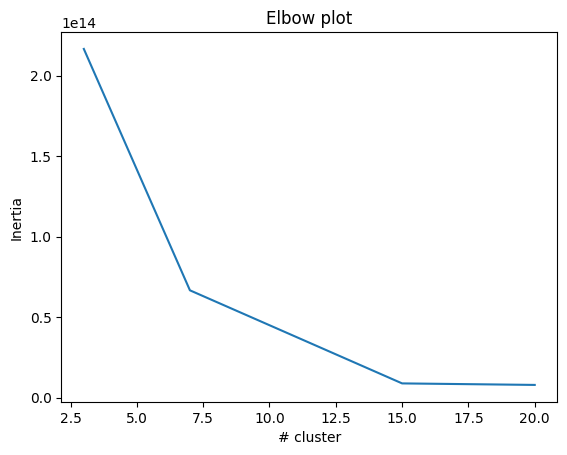

In [12]:
import matplotlib.pyplot as plt

plt.plot(range_n_clusters,dt_iner)
plt.title('Elbow plot')
plt.xlabel('# cluster')
plt.ylabel('Inertia')
plt.show()

In [15]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import  model_selection

y=np.loadtxt("classes15")

#clfb = GaussianNB()
clfb=SVC()
folds=10
result = model_selection.cross_val_score(clfb, X, y, cv=folds)
print("\nCross Validation Results %d folds:" % folds)
print("Mean Accuracy: %.5f" % result.mean())
print("Mean Std: %.5f" % result.std())






Cross Validation Results 10 folds:
Mean Accuracy: 0.99820
Mean Std: 0.00363
